# Task 1 - Preproccessing and Exploratory Data Analysis

1.1 - Importing the necessary libraries

In [745]:
try:
    import pandas as pd
    import numpy as np
except (ImportError, ModuleNotFoundError):
    print('Error occurred while importing libraries...')

1.2 - Load the dataset into Panda's DataFrame Object

In [746]:
# Store the path of the kaggle test data
test_df = pd.read_csv('./data/test.csv', header=0)
train_df = pd.read_csv('./data/train.csv', header=0)


In [747]:
print(f'train_df shape: {train_df.shape}')
print(f'test_df shape: {test_df.shape}\n')
print(f'train_df head:\n{train_df.head()}')
print(f'test_df head:\n{test_df.head()}')

train_df shape: (8693, 14)
test_df shape: (4277, 13)

train_df head:
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1

In [748]:
# Check for null entries
print(pd.isnull(train_df).sum())
print()
print(pd.isnull(test_df).sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [749]:
# Check for missing entries
print(pd.isna(train_df).sum())
print()
print(pd.isna(test_df).sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


1.3 - Basic Data Exploration

In [750]:
# Explore simple metrics measured of each class feature
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [751]:
# Explore basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [752]:
# drop Name column
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [753]:
# drop rows with missing values
#train_df.dropna(inplace=True)
#test_df.dropna(inplace=True)

In [754]:
# convert target values to ones and zeros
train_df['Transported'] = train_df['Transported'].astype(int)

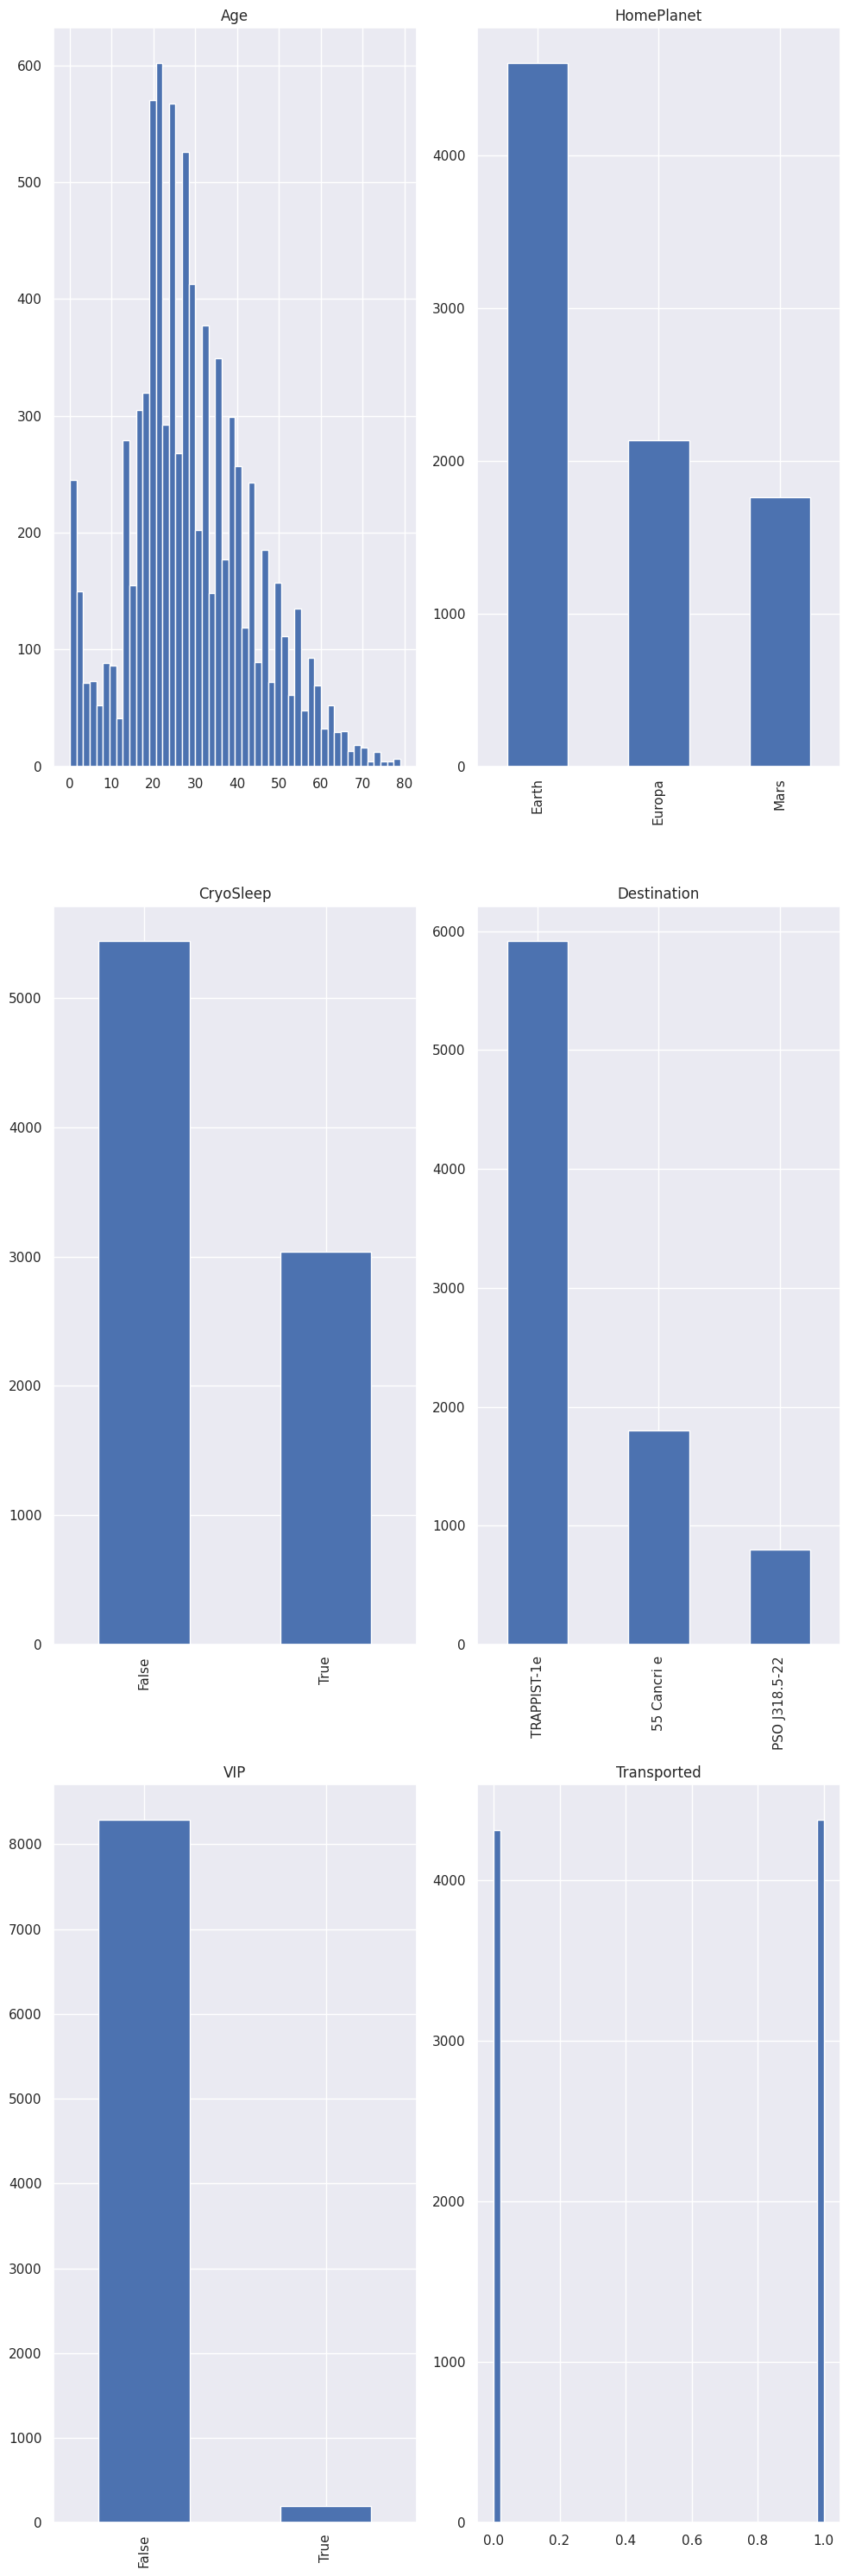

In [755]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

selected_features = ['Age', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

n_features = len(selected_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 30))

for idx, feature in enumerate(selected_features):
    row, col = idx // n_cols, idx % n_cols
    ax = axes[row, col]

    if train_df[feature].dtype == 'object':
        train_df[feature].value_counts().plot(kind='bar', title=feature, ax=ax)
    else:
        train_df[feature].hist(bins=50, ax=ax)
        ax.set_title(feature)

# Remove unused subplots
for idx in range(n_features, n_rows * n_cols):
    row, col = idx // n_cols, idx % n_cols
    fig.delaxes(axes[row][col])


plt.tight_layout()
plt.show()

In [756]:
# convert PassengerId to integers
train_df['PassengerId'] = train_df['PassengerId'].apply(lambda x: int(x.replace('_','')))
test_df['PassengerId'] = test_df['PassengerId'].apply(lambda x: int(x.replace('_','')))

# convert CryoSleep to ones and zeros
train_df['CryoSleep'] = train_df['CryoSleep'].map({True:1, False:0})
test_df['CryoSleep'] = test_df['CryoSleep'].map({True:1, False:0})

# convert VIP to ones and zeros
train_df['VIP'] = train_df['VIP'].map({True:1, False:0})
test_df['VIP'] = test_df['VIP'].map({True:1, False:0})

print(f'train_df shape: {train_df.shape}')
print(f'test_df shape: {test_df.shape}')

print(f'train_df head:\n{train_df.head()}')
print(f'test_df head:\n{test_df.head()}')

train_df shape: (8693, 13)
test_df shape: (4277, 12)
train_df head:
   PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0          101     Europa        0.0  B/0/P  TRAPPIST-1e  39.0  0.0   
1          201      Earth        0.0  F/0/S  TRAPPIST-1e  24.0  0.0   
2          301     Europa        0.0  A/0/S  TRAPPIST-1e  58.0  1.0   
3          302     Europa        0.0  A/0/S  TRAPPIST-1e  33.0  0.0   
4          401      Earth        0.0  F/1/S  TRAPPIST-1e  16.0  0.0   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0          0.0        0.0           0.0     0.0     0.0            0  
1        109.0        9.0          25.0   549.0    44.0            1  
2         43.0     3576.0           0.0  6715.0    49.0            0  
3          0.0     1283.0         371.0  3329.0   193.0            0  
4        303.0       70.0         151.0   565.0     2.0            1  
test_df head:
   PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age  V

In [757]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['HomePlanet', 'Cabin', 'Destination']
numeric_features = [col for col in train_df.columns if col not in categorical_features + ['Transported']]

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

X = preprocessor.fit_transform(X)

onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)

all_feature_names = numeric_features + list(onehot_columns)

X = X.toarray()

X = pd.DataFrame(X, columns=all_feature_names)

#Y = test_df
Y = preprocessor.transform(test_df)

Y = Y.toarray()
Y = pd.DataFrame(Y, columns=all_feature_names)
print(X.head())
print()
print(Y.head())

   PassengerId  CryoSleep       Age       VIP  RoomService  FoodCourt  \
0    -1.734411  -0.747245  0.702095 -0.154926    -0.337025  -0.284274   
1    -1.734036  -0.747245 -0.333233 -0.154926    -0.173528  -0.278689   
2    -1.733662  -0.747245  2.013510  6.454713    -0.272527   1.934922   
3    -1.733658  -0.747245  0.287964 -0.154926    -0.337025   0.511931   
4    -1.733287  -0.747245 -0.885407 -0.154926     0.117466  -0.240833   

   ShoppingMall       Spa    VRDeck  HomePlanet_Earth  ...  Cabin_T/0/P  \
0     -0.287317 -0.273736 -0.266098               0.0  ...          0.0   
1     -0.245971  0.209267 -0.227692               1.0  ...          0.0   
2     -0.287317  5.634034 -0.223327               0.0  ...          0.0   
3      0.326250  2.655075 -0.097634               0.0  ...          0.0   
4     -0.037590  0.223344 -0.264352               1.0  ...          0.0   

   Cabin_T/1/P  Cabin_T/2/P  Cabin_T/2/S  Cabin_T/3/P  Cabin_nan  \
0          0.0          0.0          0.0  

/tmp/ipykernel_21138/2273171934.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train_df.corr()['Transported'].drop('Transported')


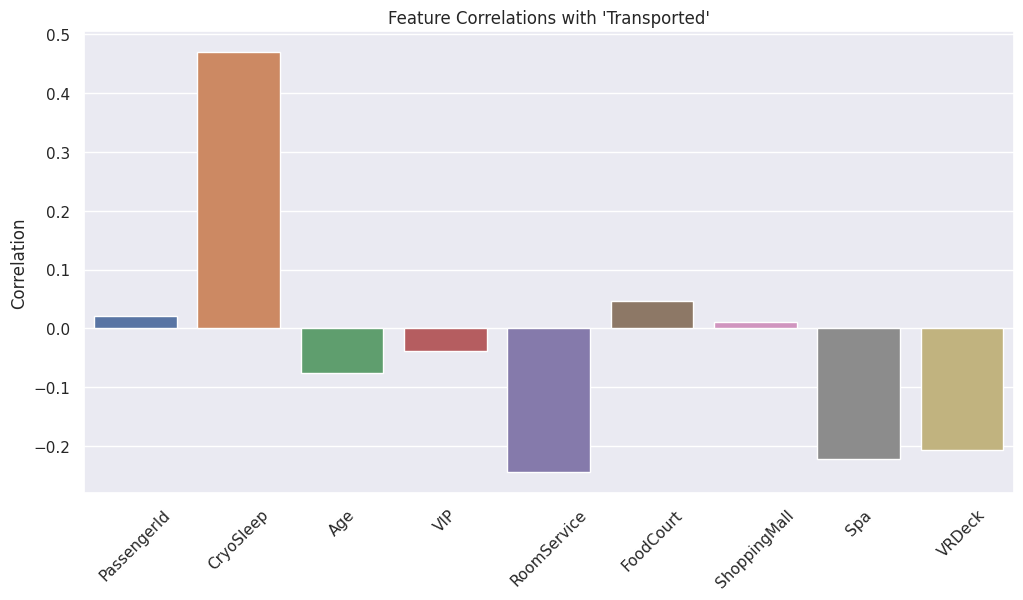

In [758]:
import seaborn as sns

# Compute the correlation between each feature and 'Transported'
correlations = train_df.corr()['Transported'].drop('Transported')

# Create a bar plot of the correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45)
plt.title("Feature Correlations with 'Transported'")
plt.ylabel("Correlation")
plt.show()

Apparently, those who were in cryo sleep are more likely to be transported.  According to the data description on Kaggle, people in cryosleep are confined to their cabins.  Older people and VIPs are less likely to be transported. That also explains why people who spend a lot on room service, spa services, and vr deck services are less likely to be transported, because those are expensive luxury amenities which VIPs and older populations are more likely to afford.

In [759]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.2, stratify = y)

In [760]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Variance Threshold Section
sel = VarianceThreshold(threshold=(0.1))
sel.fit(X_train)
X_train_vt = sel.transform(X_train)
X_test_vt = sel.transform(X_test)
Y_vt = sel.transform(Y)

In [761]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 'learning_rate': [0.01, 0.1, 1, 10],
                'max_leaf_nodes': [3, 10, 30]
                }

gb_classifier_vt = HistGradientBoostingClassifier(random_state=123)
grid_search_vt = GridSearchCV(estimator=gb_classifier_vt, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

grid_search_vt.fit(X_train_vt, y_train)
print("Best hyperparameters with variance threshold: ", grid_search_vt.best_params_)
print('Best score: ', grid_search_vt.best_score_)

Best hyperparameters with variance threshold:  {'learning_rate': 0.1, 'max_leaf_nodes': 10}
Best score:  0.7963791036136607


In [762]:
gb_classifier_vt.set_params(learning_rate=0.1, max_leaf_nodes=10)
gb_classifier_vt.fit(X_train_vt, y_train)

y_pred_vt = gb_classifier_vt.predict(Y_vt)

print(y_pred_vt.shape)
#y_pred_vt = pd.DataFrame(y_pred_vt, index=test_df.index, columns=['Transported'])

(4277,)
